## Q1 Import and explore the data
Dataset Link: https://drive.google.com/file/d/1tPHOMKD_ef-j8MuynCn2fSpbrL11-J1l/view?usp=sharing


In [60]:
import pandas as pd
import numpy as np
df = pd.read_csv("pulsar.txt", sep=",")
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


## Q2 Carry out data pre-processing

In [5]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


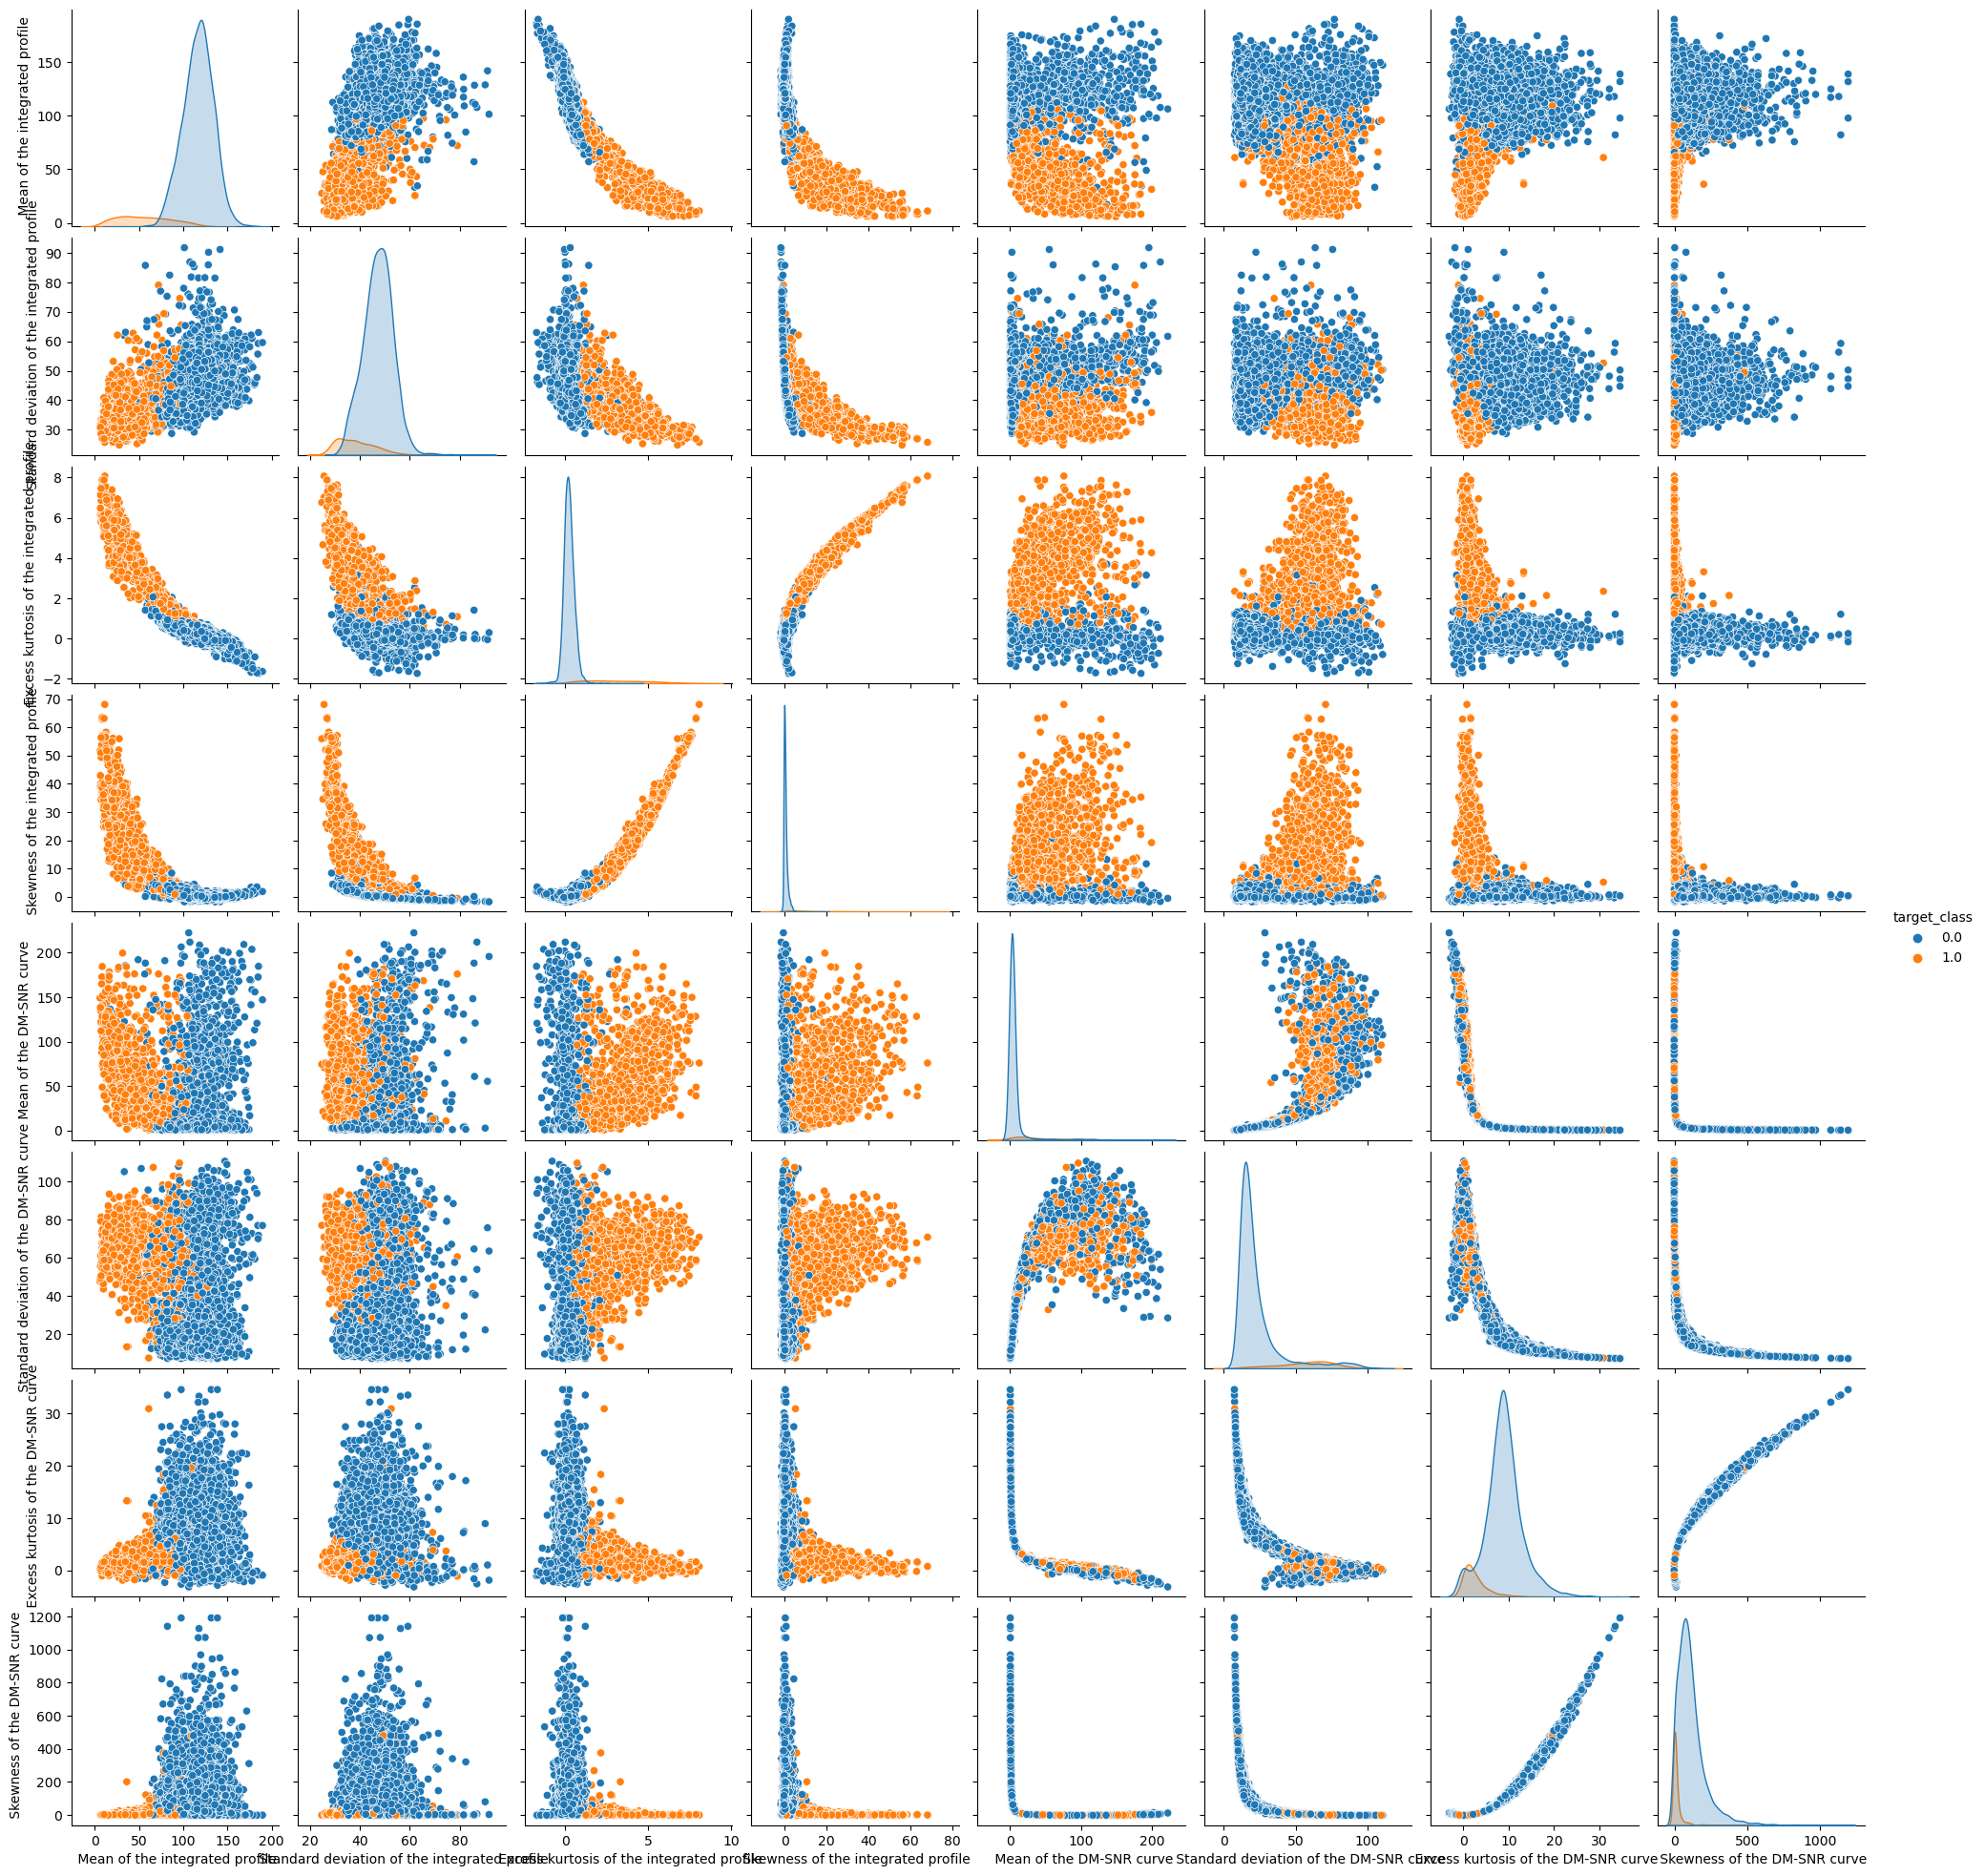

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue = 'target_class')
plt.show()

In [7]:
df.dropna(axis=0,inplace=True)

## Q3 Split the data in traina and test set

In [30]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Q4 Scale the data using Standard Scaler

#### Q4a According to you, why is scaling important in SVM? What are the different methods for scaling the data available in sklearn.preprocessing?

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Q5 Implement SVM

Different types of kernels in SVM:
https://www.kaggle.com/discussions/questions-and-answers/326336


### Q5a Linear SVM

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C' : [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(SVC(kernel = 'linear',random_state = 0),scoring='f1', param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

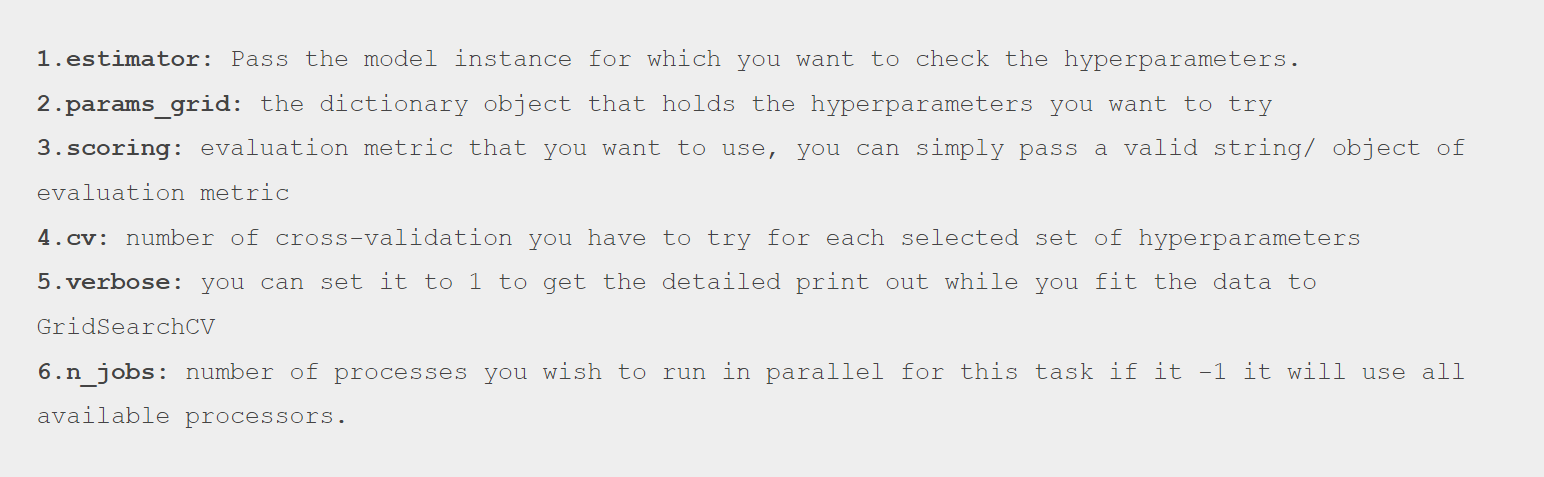

In [90]:
result=grid.best_estimator_
classifier=result
classifier.fit(x_train,y_train)

SVC(C=10, random_state=0)

In [91]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150283,0.020203,0.067238,0.011756,0.1,{'C': 0.1},0.976276,0.979152,0.977714,0.971244,0.970504,0.974978,0.003480,5
1,0.112985,0.006342,0.049248,0.006928,1,{'C': 1},0.976995,0.982746,0.978433,0.974838,0.973381,0.977279,0.003239,3
2,0.150488,0.024133,0.048473,0.010103,10,{'C': 10},0.979871,0.982027,0.977714,0.976276,0.974820,0.978142,0.002561,1
3,0.261018,0.022754,0.037742,0.002951,100,{'C': 100},0.979871,0.982027,0.974838,0.975557,0.975540,0.977567,0.002856,2
4,0.850348,0.102260,0.039399,0.006908,1000,{'C': 1000},0.976276,0.982027,0.971244,0.976276,0.974820,0.976129,0.003476,4


Ans: The Best Cost comes out to be 100, look at code cell above for rank_test_score or print grid.best_estimator_

### Q5b Polynomial Kernel

Apply Linear SVM for degrees = [1,2,3,4,5], predict for the test set and check f1 score for each of the degrees. State the best degree. 

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C' : [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(SVC(kernel = 'poly',random_state = 0), param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.973 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.978 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.974 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.971 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.971 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.977 total time=   0.1s
[CV 2/5] END ...............................C=1;, score=0.980 total time=   0.1s
[CV 3/5] END ...............................C=1;, score=0.976 total time=   0.1s
[CV 4/5] END ...............................C=1;, score=0.974 total time=   0.1s
[CV 5/5] END ...............................C=1;, score=0.975 total time=   0.1s
[CV 1/5] END ..............................C=10;, score=0.976 total time=   0.2s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(kernel='poly', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=3)

In [98]:
result=grid.best_estimator_
classifier=result
classifier.fit(x_train,y_train)

SVC(C=1000, kernel='poly', random_state=0)

In [99]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100317,0.013450,0.017497,0.003132,0.1,{'C': 0.1},0.972682,0.977714,0.974119,0.970525,0.971223,0.973253,0.002551,5
1,0.164242,0.016777,0.012449,0.001645,1,{'C': 1},0.976995,0.979871,0.976276,0.974119,0.974820,0.976416,0.002006,4
2,0.366675,0.067471,0.013922,0.003742,10,{'C': 10},0.976276,0.982027,0.978433,0.976995,0.974820,0.977710,0.002453,2
3,1.694477,0.397856,0.012732,0.002746,100,{'C': 100},0.975557,0.982746,0.978433,0.976995,0.974101,0.977566,0.002965,3
4,11.636717,3.443106,0.011446,0.001862,1000,{'C': 1000},0.977714,0.983465,0.978433,0.976276,0.974820,0.978142,0.002937,1


Ans: The Best Cost comes out to be 100 / 1000 which one?

### Q5c Sigmoid Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C' : [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(SVC(kernel = 'sigmoid',random_state = 0), param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.879 total time=   0.5s
[CV 2/5] END .............................C=0.1;, score=0.883 total time=   0.5s
[CV 3/5] END .............................C=0.1;, score=0.868 total time=   0.6s
[CV 4/5] END .............................C=0.1;, score=0.873 total time=   0.6s
[CV 5/5] END .............................C=0.1;, score=0.869 total time=   0.7s
[CV 1/5] END ...............................C=1;, score=0.874 total time=   0.6s
[CV 2/5] END ...............................C=1;, score=0.882 total time=   0.6s
[CV 3/5] END ...............................C=1;, score=0.865 total time=   0.6s
[CV 4/5] END ...............................C=1;, score=0.866 total time=   0.6s
[CV 5/5] END ...............................C=1;, score=0.863 total time=   0.6s
[CV 1/5] END ..............................C=10;, score=0.874 total time=   0.5s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(kernel='sigmoid', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=3)

In [101]:
result=grid.best_estimator_
classifier=result
classifier.fit(x_train,y_train)

SVC(C=0.1, kernel='sigmoid', random_state=0)

In [102]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.562573,0.047267,0.138771,0.021260,0.1,{'C': 0.1},0.879224,0.882818,0.867721,0.872753,0.869065,0.874316,0.005829,1
1,0.563047,0.029918,0.138848,0.016448,1,{'C': 1},0.874191,0.882099,0.864845,0.865564,0.862590,0.869858,0.007280,2
2,0.529450,0.023981,0.097349,0.013263,10,{'C': 10},0.874191,0.881380,0.863408,0.865564,0.861151,0.869139,0.007547,3
3,0.348276,0.102314,0.070486,0.019134,100,{'C': 100},0.873472,0.881380,0.863408,0.865564,0.861151,0.868995,0.007456,4
4,0.249198,0.025543,0.051797,0.011827,1000,{'C': 1000},0.873472,0.881380,0.863408,0.865564,0.861151,0.868995,0.007456,4


Ans: The Best Cost comes out to be 0.1

### Q5d RBF Kernel

Apply Linear SVM for costs (C) = [0.1, 1, 10, 100, 1000], predict for the test set and check f1 score for each of the costs. State the best cost 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C' : [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(SVC(kernel = 'rbf',scoring='f1',random_state = 0), param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'scoring'

In [ ]:
result=grid.best_estimator_
classifier=result
classifier.fit(x_train,y_train)

In [ ]:
pd.DataFrame(grid.cv_results_)

Ans: The Best Cost comes out to be 10